## Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!ls /content/drive/MyDrive/EDA-STATPROB/


Mounted at /content/drive
 cybersecurity_intrusion_data.csv  'Eda StatProb.ipynb'   LossFromNetCrime.csv


In [ ]:
!cp /content/drive/MyDrive/EDA-STATPROB/cybersecurity_intrusion_data.csv datasets.csv

## Environment Setup
Setup environment by import all required libraries

In [ ]:
# import required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df = pd.read_csv('datasets.csv')

## 1. Dataset Description

Source : https://www.kaggle.com/datasets/dnkumars/cybersecurity-intrusion-detection-dataset

### Show the first 10 lines of the dataset (Overview)

In [ ]:
# Using head(10) to show the first 10 lines of the dataset
df.head(10)

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
5,SID_00006,453,UDP,5,380.471550,AES,0.422486,2,Chrome,1,0
6,SID_00007,815,ICMP,4,728.107165,AES,0.413772,1,Chrome,0,1
7,SID_00008,653,TCP,3,12.599906,DES,0.097719,3,Chrome,1,1
8,SID_00009,406,TCP,2,542.558895,NaN,0.294580,0,Chrome,1,0
9,SID_00010,608,UDP,6,531.944107,NaN,0.424117,1,Chrome,0,0


### Calculate dataset shape, missing value, duplicate records, descriptive statistics

In [ ]:
# Dataset shape (row, column)
row, column = df.shape

print("Number of rows: ", row)
print("Number of columns: ", column)

Number of rows:  9537
Number of columns:  11


In [ ]:
# Duplicate records
int(df.duplicated().sum())

0

In [ ]:
# Missing value
df.isnull().sum()

,0
session_id,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
encryption_used,1966
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0


In [ ]:
# Get info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [ ]:
# Get statical summary
df.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


### Data cleaning

In [ ]:
df_clean = df.copy()

In [ ]:
df['browser_type'].unique()

array(['Edge', 'Firefox', 'Chrome', 'Unknown', 'Safari'], dtype=object)

In [ ]:
# Mapping categorical data to numbers

"""
ICMP = 0
TCP = 1
UDP = 2
"""
mapping_protocol_type = {"ICMP": 0, "TCP": 1, "UDP": 2}
df_clean["protocol_type"] = df["protocol_type"].map(mapping_protocol_type)


"""
DES = 0
AES = 1
ON ENCRYPTION = 2
"""
mapping_encryption_used = {"DES": 0, "AES": 1}
df_clean["encryption_used"] = df["encryption_used"].map(mapping_encryption_used)

df_clean["encryption_used"] = df_clean["encryption_used"].fillna(2).astype(int)


"""
Edge = 0
Firefox = 1
Chrome = 2
Safari = 3
Unknown = 4
"""
mapping_browser = {
    "Edge": 0,
    "Firefox": 1,
    "Chrome": 2,
    "Safari": 3,
    "Unknown": 4
}

df_clean["browser_type"] = df["browser_type"].map(mapping_browser).astype(int)

df_clean.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,1,4,492.983263,0,0.606818,1,0,0,1
1,SID_00002,472,1,3,1557.996461,0,0.301569,0,1,0,0
2,SID_00003,629,1,3,75.044262,0,0.739164,2,2,0,1
3,SID_00004,804,2,4,601.248835,0,0.123267,0,4,0,1
4,SID_00005,453,1,5,532.540888,1,0.054874,1,1,0,0


Code below will visualize login attempts into histogram

## 2. Outlier Analysis

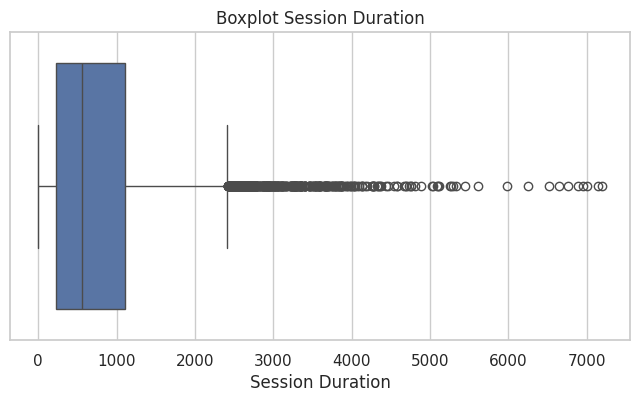

In [ ]:
# Visualize login attempts

sns.set(style="whitegrid")

# Histogram login_attempts
plt.figure(figsize=(8,4))
sns.boxplot(x=df_clean["session_duration"])
plt.title("Boxplot Session Duration")
plt.xlabel("Session Duration")
plt.show()

In [ ]:
session_time = df_clean['session_duration']
range_val = session_time.max() - session_time.min()

# Mean & Std Deviation
mean_val = session_time.mean()
std_val = session_time.std()

# Q1, Q3, IQR
Q1 = session_time.quantile(0.25)
Q3 = session_time.quantile(0.75)
IQR = Q3 - Q1

# Outlier threshold (rule of thumb)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = session_time[(session_time < lower_bound) | (session_time > upper_bound)]

# Print result
print(f"Range: {range_val}")
print(f"Mean: {mean_val:.2f}")
print(f"Std Dev: {std_val:.2f}")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Total : {len(outliers)}")

Range: 7189.892212563188
Mean: 792.75
Std Dev: 786.56
Q1: 231.95300642419463, Q3: 1105.3806022240433, IQR: 873.4275957998486
Lower Bound: -1078.1883872755782, Upper Bound: 2415.521995923816
Total : 418


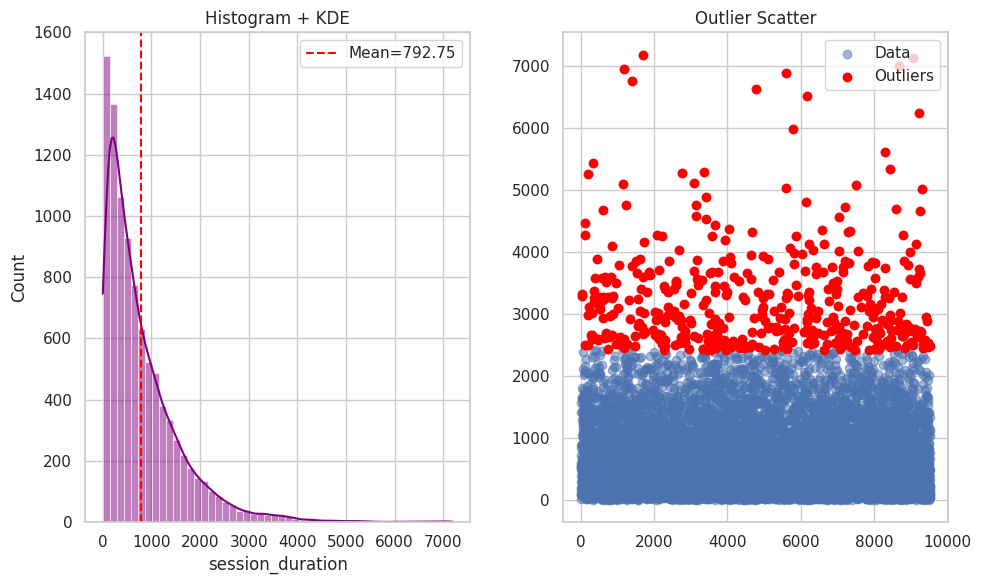

In [ ]:
plt.figure(figsize=(14, 6))

# 1. Histogram + KDE
plt.subplot(1, 3, 2)
sns.histplot(session_time, bins=50, kde=True, color="purple")
plt.axvline(mean_val, color='red', linestyle='--', label=f"Mean={mean_val:.2f}")
plt.legend()
plt.title("Histogram + KDE")

# 3. Outlier scatter (using index)
plt.subplot(1, 3, 3)
plt.scatter(range(len(session_time)), session_time, alpha=0.5, label="Data")
plt.scatter(outliers.index, outliers, color="red", label="Outliers")
plt.title("Outlier Scatter")
plt.legend()

plt.tight_layout()
plt.show()

### Outlier analysis result

During the analysis of the session_duration variable, several extreme values (outliers) were detected. These outliers represent unusually long sessions compared to the majority of the data.

Instead of removing them, the decision is to keep the outliers in the dataset. The reasoning is:
- Part of the phenomenon – Long sessions may indicate real-world cases such as prolonged attacks, brute-force attempts, or unusual user behavior.
- Potentially informative – Outliers might correlate with the target variable (attack_detected), making them important signals for modeling.
- Not erroneous – There is no evidence suggesting these values are the result of logging errors or noise.

Therefore, the outliers will be retained for further analysis and modeling, since they may provide valuable insights into anomalous activities.

## 3. Univariate Analysis
Univariate analysis is a statistical method to describe or summarize a single variable at a time, without considering any other variables.

In [ ]:
# Frequency counts
print("Browser Mapping: ", mapping_browser)

browser_counts = df_clean['browser_type'].value_counts()
print("Browser Frequency:\n", browser_counts)

# Percentage
browser_percentage = df_clean['browser_type'].value_counts(normalize=True) * 100
print("\nBrowser Percentage (%):\n", browser_percentage)

Browser Mapping:  {'Edge': 0, 'Firefox': 1, 'Chrome': 2, 'Safari': 3, 'Unknown': 4}
Browser Frequency:
 browser_type
2    5137
1    1944
0    1469
4     502
3     485
Name: count, dtype: int64

Browser Percentage (%):
 browser_type
2    53.863899
1    20.383768
0    15.403167
4     5.263710
3     5.085457
Name: proportion, dtype: float64


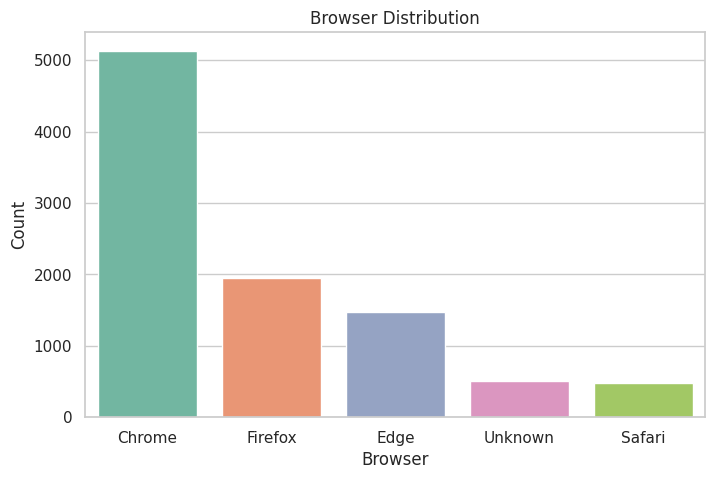

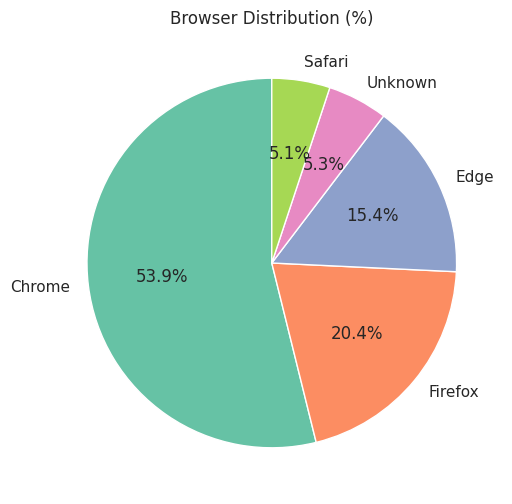

In [ ]:
reverse_mapping_browser = {v: k for k, v in mapping_browser.items()}

browser_labels = [reverse_mapping_browser[idx] for idx in browser_counts.index]

browser_df = pd.DataFrame({
    "Browser": browser_labels,
    "Count": browser_counts.values
})

plt.figure(figsize=(8,5))
sns.barplot(data=browser_df, x="Browser", y="Count", palette="Set2", hue="Browser", legend=False)
plt.title("Browser Distribution")
plt.xlabel("Browser")
plt.ylabel("Count")
plt.show()

# Visualization - Pie Chart
plt.figure(figsize=(6,6))
plt.pie(browser_counts.values, labels=browser_labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Browser Distribution (%)")
plt.show()

               Frequency  Percentage
protocol_type                       
1                   6624       69.46
2                   2406       25.23
0                    507        5.32


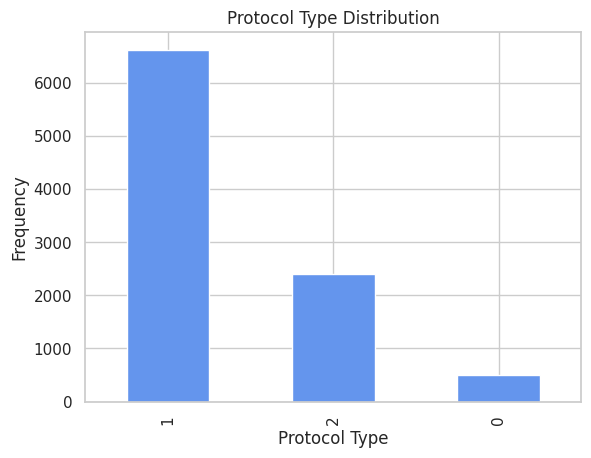

In [ ]:
# Frequency Count
freq = df_clean['protocol_type'].value_counts()

# Percentage
perc = df_clean['protocol_type'].value_counts(normalize=True) * 100

# Gabungkan ke satu tabel
summary = pd.DataFrame({'Frequency': freq, 'Percentage': perc.round(2)})
print(summary)

# Visualization
summary['Frequency'].plot(kind='bar', color='cornflowerblue')
plt.title("Protocol Type Distribution")
plt.xlabel("Protocol Type")
plt.ylabel("Frequency")
plt.show()


                 Frequency  Percentage
attack_detected                       
0                     5273       55.29
1                     4264       44.71


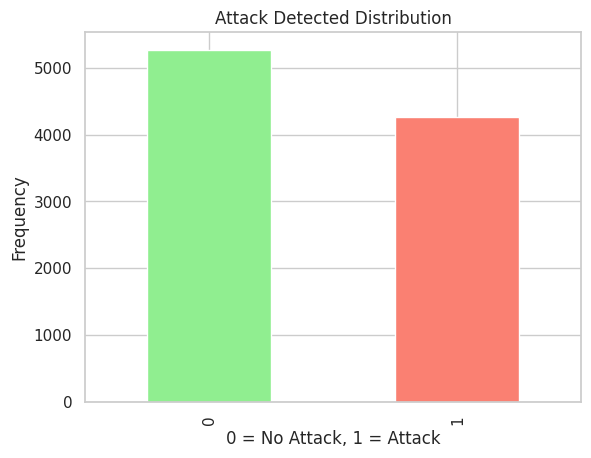

In [ ]:
# Frequency Count
freq = df_clean['attack_detected'].value_counts()

# Percentage
perc = df_clean['attack_detected'].value_counts(normalize=True) * 100

# Gabungkan ke tabel
summary = pd.DataFrame({'Frequency': freq, 'Percentage': perc.round(2)})
print(summary)

# Visualization (Bar Chart)
summary['Frequency'].plot(kind='bar', color=['lightgreen','salmon'])
plt.title("Attack Detected Distribution")
plt.xlabel("0 = No Attack, 1 = Attack")
plt.ylabel("Frequency")
plt.show()


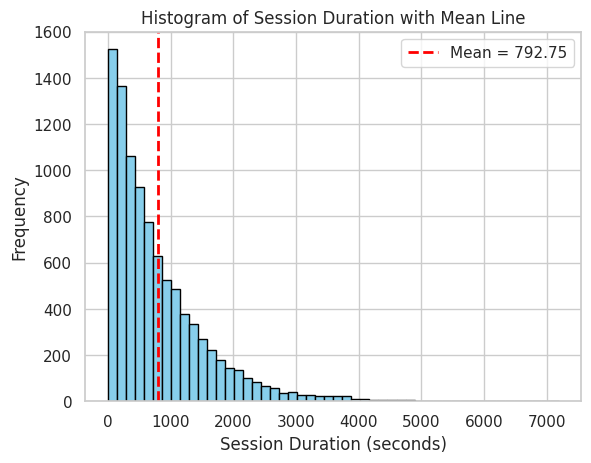

In [ ]:
session_time = df_clean['session_duration']

# Hitung mean
mean_val = session_time.mean()

# Plot histogram + garis mean
plt.hist(session_time, bins=50, color="skyblue", edgecolor="black")
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_val:.2f}")
plt.title("Histogram of Session Duration with Mean Line")
plt.xlabel("Session Duration (seconds)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## 4. Bivariate Analysis
Bivariate analysis is a statistical method to study the relationship between exactly two variables, aiming to determine if they are related, and if so, to describe the nature, strength, and direction of that relationship

### Session Duration vs Attack Detected (Numerical vs Categorical)

In [ ]:
print("Session Duration Statistics by Attack Detected:")
print(df_clean.groupby("attack_detected")["session_duration"].describe())

Session Duration Statistics by Attack Detected:
                  count        mean         std  min         25%         50%  \
attack_detected                                                                
0                5273.0  763.321311  728.250219  0.5  232.042818  554.069552   
1                4264.0  829.131980  851.857703  0.5  231.664142  559.358924   

                         75%          max  
attack_detected                            
0                1066.236472  7190.392213  
1                1166.808449  7141.336086  


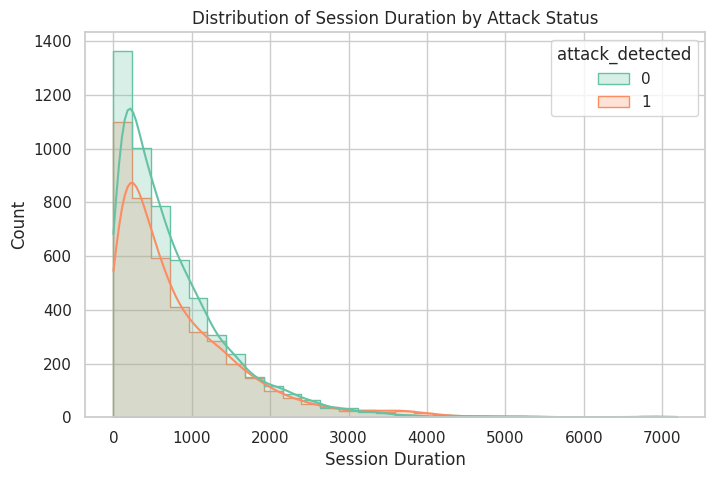

In [ ]:
# Histogram with hue
plt.figure(figsize=(8,5))
sns.histplot(data=df_clean, x="session_duration", hue="attack_detected", bins=30, kde=True, palette="Set2", element="step")
plt.title("Distribution of Session Duration by Attack Status")
plt.xlabel("Session Duration")
plt.ylabel("Count")
plt.show()

### Browser Type vs Attack Detected (Categorical vs Categorical)

In [ ]:
crosstab_browser = pd.crosstab(df_clean['browser_type'], df_clean['attack_detected'])
print("\nBrowser vs Attack Detected:\n", crosstab_browser)

# Normalized crosstab (percentage per browser)
crosstab_browser_pct = pd.crosstab(df_clean['browser_type'], df_clean['attack_detected'], normalize='index') * 100
print("\nBrowser vs Attack Detected (%)\n", crosstab_browser_pct)


Browser vs Attack Detected:
 attack_detected     0     1
browser_type               
0                 826   643
1                1095   849
2                2935  2202
3                 282   203
4                 135   367

Browser vs Attack Detected (%)
 attack_detected          0          1
browser_type                         
0                56.228727  43.771273
1                56.327160  43.672840
2                57.134514  42.865486
3                58.144330  41.855670
4                26.892430  73.107570


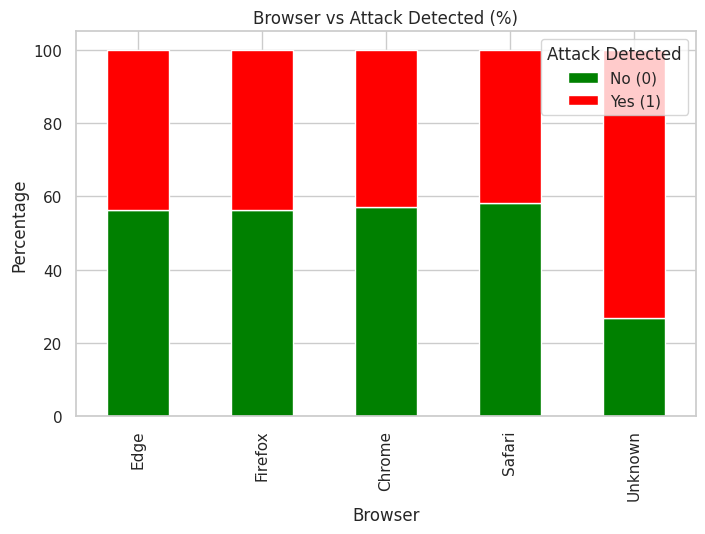

In [ ]:
# Crosstab (persentase per browser)
crosstab_browser_pct = pd.crosstab(
    df_clean['browser_type'],
    df_clean['attack_detected'],
    normalize='index'
) * 100

# Ganti index angka dengan label teks
crosstab_browser_pct.index = crosstab_browser_pct.index.map(reverse_mapping_browser)

# Warna sesuai label (0 -> hijau, 1 -> merah)
colors = ["green", "red"]

# Plot
crosstab_browser_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(8,5),
    color=colors
)

plt.title("Browser vs Attack Detected (%)")
plt.xlabel("Browser")
plt.ylabel("Percentage")
plt.legend(title="Attack Detected", labels=["No (0)", "Yes (1)"])
plt.show()

### IP Reputation vs Attack Detected (continous vs categorical)

In [ ]:
df.groupby("attack_detected")["ip_reputation_score"].describe()


,count,mean,std,min,25%,50%,75%,max
attack_detected,,,,,,,,
0,5273.0,0.297636,0.147434,0.007030,0.177466,0.293780,0.412074,0.599703
1,4264.0,0.373015,0.200488,0.002497,0.211048,0.347314,0.525693,0.924299


In [ ]:
g0 = df[df["attack_detected"]==0]["ip_reputation_score"]
g1 = df[df["attack_detected"]==1]["ip_reputation_score"]

t, p = stats.ttest_ind(g0, g1, equal_var=False)
print(f"T-test: t={t:.3f}, p={p:.4f}")


T-test: t=-20.478, p=0.0000


/tmp/ipython-input-2409333100.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0,g1], labels=["No Attack","Attack"])


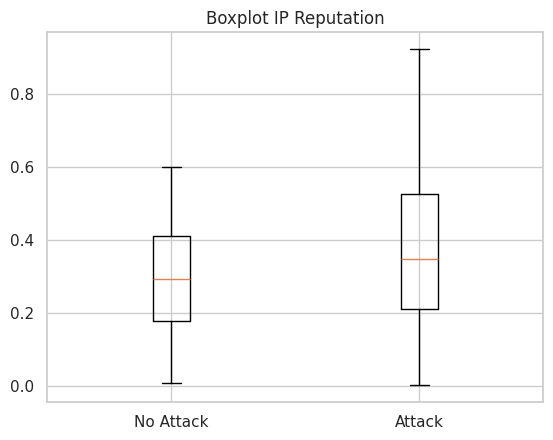

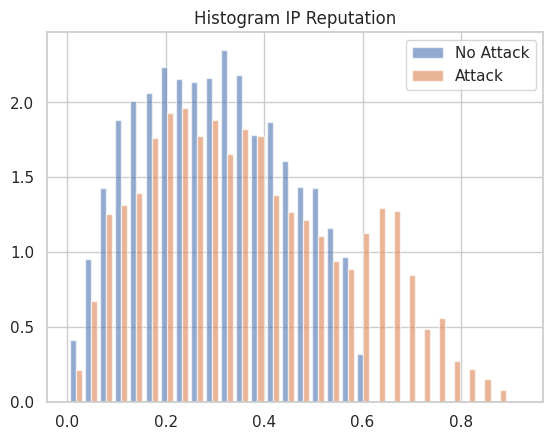

In [ ]:
plt.boxplot([g0,g1], labels=["No Attack","Attack"])
plt.title("Boxplot IP Reputation"); plt.show()

plt.hist([g0,g1], bins=30, alpha=0.6, label=["No Attack","Attack"], density=True)
plt.legend(); plt.title("Histogram IP Reputation"); plt.show()


### Unusual Time Access VS Attack Detected (Bivariate)

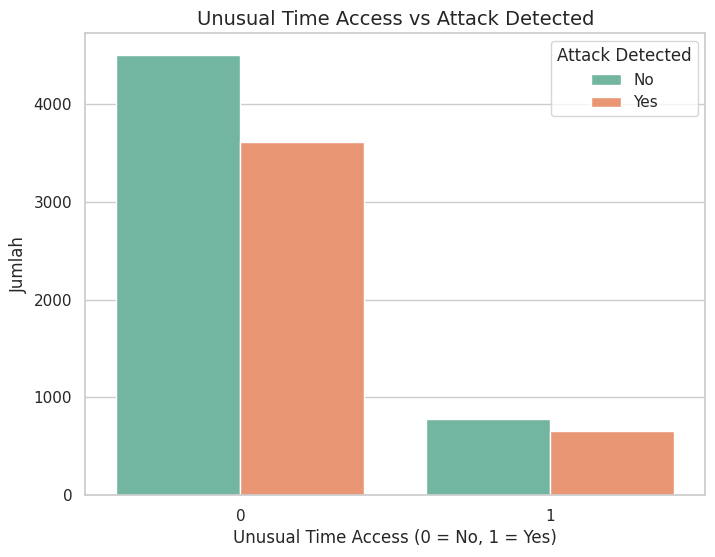

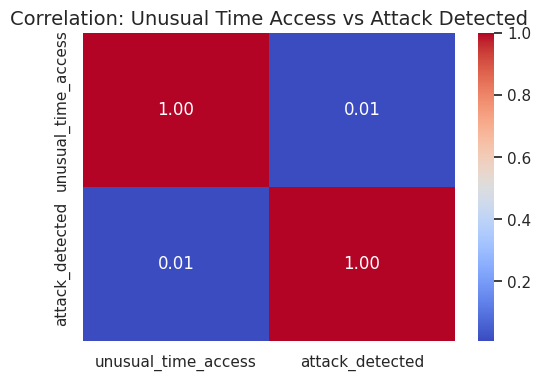

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_clean, x="unusual_time_access", hue="attack_detected", palette="Set2")

plt.title("Unusual Time Access vs Attack Detected", fontsize=14)
plt.xlabel("Unusual Time Access (0 = No, 1 = Yes)")
plt.ylabel("Jumlah")
plt.legend(title="Attack Detected", labels=["No", "Yes"])
plt.show()

# --- Heatmap (korelasi) ---
plt.figure(figsize=(6,4))
corr = df_clean[["unusual_time_access", "attack_detected"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", cbar=True, fmt=".2f")

plt.title("Correlation: Unusual Time Access vs Attack Detected", fontsize=14)
plt.show()

### Login Failed vs Attack Detected


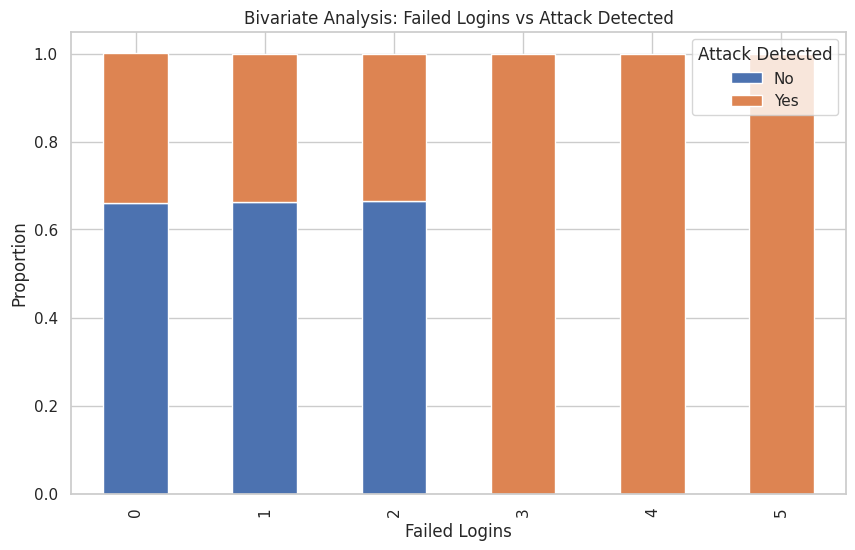

In [ ]:
# Crosstab antara failed_logins dan attack_detected
crosstab = pd.crosstab(df_clean["failed_logins"], df_clean["attack_detected"], normalize="index")

# Plot stacked bar chart
crosstab.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Bivariate Analysis: Failed Logins vs Attack Detected")
plt.xlabel("Failed Logins")
plt.ylabel("Proportion")
plt.legend(title="Attack Detected", labels=["No", "Yes"])
plt.show()

## 5. Multivariate Analysis
Multivariate analysis (MVA) is a statistical technique that simultaneously examines more than two variables in a dataset to uncover patterns, correlations, and relationships among them, providing a deeper and more comprehensive understanding than analyzing variables one by one.

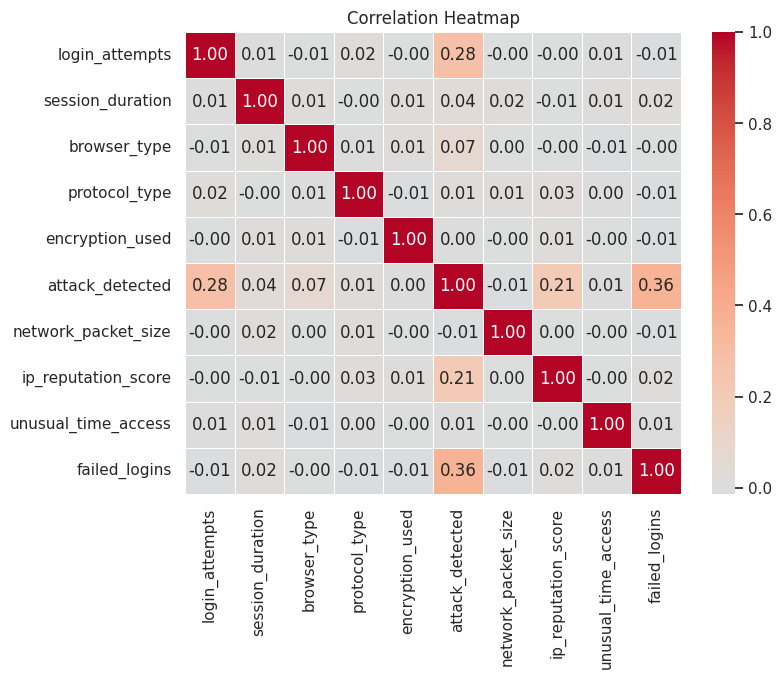

In [ ]:
features = ["login_attempts", "session_duration", "browser_type", "protocol_type", "encryption_used", "attack_detected", "network_packet_size", "ip_reputation_score","unusual_time_access", "failed_logins"]
corr_matrix = df_clean[features].corr(method='pearson')

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## 6. Extended Interpretation
1. Login Attempts vs Attack Detected

    From the heatmap, login_attempts has the strongest correlation with attack_detected (0.28).

    This confirms that repeated login attempts are a strong indicator of suspicious activity or brute-force style attacks.

2. Session Duration vs Attack Detected

    Correlation is weak (0.04), but looking at the descriptive statistics:

    - Mean session duration is slightly higher for attack sessions (829s) than normal sessions (763s).

    - Both groups have high variability (std ~ 728–851).

    - Maximum session durations are extremely long in both cases (~7,100s), which may represent outliers or special cases worth investigating.

    - Although correlation is low, the longer average duration in attack sessions suggests that attackers may maintain longer connections once inside.

3. Browser Type vs Attack Detected

    Overall correlation with attack detection is weak (0.07).

    But looking at the breakdown:

    - Most browsers (Edge, Firefox, Chrome, Safari) have around 56–58% no attack vs 42–44% attack.

    - However, the “Unknown” browser shows a very different distribution: 73% of sessions flagged as attacks.

    - This indicates that while mainstream browsers don’t show much difference, unrecognized or uncommon browsers are a strong red flag.

4. Protocol Type & Encryption Used

    Both show almost no correlation with attack detection.

    In this dataset, the protocol (ICMP, TCP, UDP) or encryption method (AES, DES) do not strongly affect whether an attack is detected.

5. IP Reputation vs Attack Detected.
   - Descriptive Statistics: The mean IP reputation score in attack sessions is higher than in non-attack sessions, indicating that attacking IPs generally have worse reputations. The boxplot also shows that the distribution of reputation scores shifts upward for attack sessions compared to normal ones.

   - Statistical Test: The t-test result (p < 0.05) confirms that the difference in reputation scores between attack and non-attack groups is statistically significant.

   - Interpretation: These findings suggest that IP reputation is a strong indicator of malicious activity. Sessions flagged as attacks are more likely to originate from IPs with suspicious reputations. Incorporating IP reputation scoring into intrusion detection systems can therefore enhance early detection, as malicious IPs often reappear across different attacks.

6. Unusual Time Access vs Attack Detected

    - Correlation: Very weak (0.01).
        Statistically, unusual_time_access shows almost no linear relationship with attack_detected.
    - Countplot Analysis:
      For normal access times (0), most sessions are not attacks, though attacks still occur.
      For unusual access times (1), the overall number of sessions is smaller, but the proportion of attacks is higher compared to normal access.
    - Interpretation:
    Unusual time access alone is not a strong predictor of attacks, but it raises the level of risk.
    The weak correlation suggests it should be combined with other features (e.g., failed_logins, ip_reputation_score) for stronger detection.

    In practice, unusual access times can be used as an additional alert rule in intrusion detection systems, since attackers may prefer off-hours when monitoring is weaker.

7. Failed login vs Attack Detected
   - When failed logins = 0–2, around 33–34% of sessions are classified as attacks. This means attacks can still occur even with few failed login attempts.

   -  When failed logins ≥ 3, 100% of the sessions are detected as attacks. This shows that a higher number of failed logins is a very strong indicator of an attack.

   - The pattern suggests that failed login count is a critical predictor for intrusion detection.

    Conclusion: The more failed login attempts occur, the higher (and eventually certain) the likelihood of an attack.

## 7. Insight & Summary

#### Interesting Patterns in the Data:

- Login Attempts show the clearest relationship with attack_detected. The higher the number of login attempts, the greater the likelihood of an attack being detected.
- Session Duration is not strongly correlated statistically, but attack sessions tend to last slightly longer on average compared to normal sessions.

- Browser Type reveals a striking pattern: common browsers (Edge, Firefox, Chrome, Safari) have similar attack rates (~42–44%). However, the Unknown browser is dominated by attacks (73%), making it a strong potential indicator.

- Protocol Type and Encryption Used show no meaningful impact on whether an attack is detected in this dataset.

- Moderate risk at low failed logins:
Even with 0–2 failed login attempts, about 33–34% of sessions resulted in attacks. This indicates that not all attacks rely on brute force login attempts—some may exploit other vulnerabilities.

- Critical threshold at 3 failed logins:
Once the number of failed logins reaches 3 or more, 100% of the sessions are classified as attacks. This makes the failed login count a highly reliable indicator for identifying malicious activity.

- Predictive significance:
The strong upward trend shows that failed login count is one of the most critical features for intrusion detection in this dataset. It should be considered a key variable when building predictive models for attack detection.

<br />

#### Most Influential Variables:

- Login Attempts → the strongest predictor of attacks.

- Browser Type (especially Unknown) → highly indicative of suspicious activity.

- Session Duration (secondary factor) → while weakly correlated, outliers and longer sessions may contribute to attack detection.

- unusual_time_access: Sessions occurring at abnormal times could signal malicious intent.

- ip_reputation_score: Low reputation scores strongly suggest suspicious or blacklisted IPs.

<br />


#### Potential Issues

- Low target correlation: most features show weak correlations (<0.3) with the target, meaning additional engineered features may be necessary for predictive modeling.

- Imbalanced patterns across categories: some classes (like Unknown browser) are overrepresented in attacks, which could bias models if not handled properly.

<br />


#### Follow-Up Questions for Modeling

- Can we create new features (e.g., categorizing login attempts into bins, identifying unusually long sessions, or flagging uncommon browsers)?

- Do attackers exploit specific browser-protocol combinations that are not obvious when analyzed separately?

- Would external enrichment (e.g., adding geolocation, time-of-day features) improve model accuracy?

